# Benchmark analysis
## Table of contents
1. [Reading the data](#Reading-the-data)
1. [Separating the catagories](#Separating-the-categories)
1. [Parties vs iterations category](#Parties_vs_iterations-category)
1. [Features category](#Features-category)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

## Reading the data

In [2]:
BENCHMARK_FILE = "benchmark_results/report-seer_2024-12-04T11:53:46.704684.csv"

In [3]:
df = pd.read_csv(BENCHMARK_FILE)

#Filter unsuccesful run
df = df[df.comment!="Not enough features"]

df = df.drop(columns=["comment"])
display(df)

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,category
0,500.0,6.0,100.0,2.0,5.607465,79.649397,4.208013e-09,2.586191e-04,1.488326e-04,0.634463,0.633898,parties_vs_iterations
1,500.0,6.0,100.0,2.0,5.266988,80.378823,4.208013e-09,2.586191e-04,1.488326e-04,0.634463,0.633898,parties_vs_iterations
2,500.0,6.0,100.0,2.0,5.289247,79.665589,4.208013e-09,2.586191e-04,1.488326e-04,0.634463,0.633898,parties_vs_iterations
3,500.0,6.0,500.0,2.0,5.307488,224.261916,7.262152e-16,9.868687e-08,5.935722e-08,0.633898,0.633898,parties_vs_iterations
4,500.0,6.0,500.0,2.0,5.188227,225.310894,7.262152e-16,9.868687e-08,5.935722e-08,0.633898,0.633898,parties_vs_iterations
...,...,...,...,...,...,...,...,...,...,...,...,...
112,500.0,6.0,400.0,4.0,6.955969,227.823776,7.910682e-16,1.178854e-07,5.935722e-08,0.633898,0.633898,parties_vs_iterations
113,500.0,6.0,400.0,4.0,6.961327,231.454214,7.910682e-16,1.178854e-07,5.935722e-08,0.633898,0.633898,parties_vs_iterations
114,500.0,6.0,400.0,5.0,7.579554,239.781051,3.015724e-14,5.447506e-07,4.194054e-07,0.633898,0.633898,parties_vs_iterations
115,500.0,6.0,400.0,5.0,7.891466,239.542407,3.015724e-14,5.447506e-07,4.194054e-07,0.633898,0.633898,parties_vs_iterations


In [4]:
df.query("category == 'parties_vs_iterations' & parties == 3 & iterations == 500")

,records,features,iterations,parties,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central,category
12,500.0,6.0,500.0,3.0,6.178273,245.332134,7.159837e-18,1.272356e-08,5.234158e-09,0.633898,0.633898,parties_vs_iterations
13,500.0,6.0,500.0,3.0,5.918918,242.932063,7.159837e-18,1.272356e-08,5.234158e-09,0.633898,0.633898,parties_vs_iterations
14,500.0,6.0,500.0,3.0,5.991264,247.100630,7.159837e-18,1.272356e-08,5.234158e-09,0.633898,0.633898,parties_vs_iterations


## Taking the average over 3 runs.

Every configuration has been run 3 times. We need to take the average values over these runs

In [5]:
df_mean = df.groupby(["records", "features", "iterations", "parties", "category"], as_index=False).mean()

df_mean

,records,features,iterations,parties,category,preparation_runtime,convergence_runtime,mse,sad,mad,c_index_verticox,c_index_central
0,50.0,6.0,500.0,3.0,records,5.946760,64.098166,5.874072e-14,1.060843e-06,4.185989e-07,0.760000,0.760000
1,100.0,6.0,500.0,3.0,records,5.907703,154.862617,5.332992e-14,8.481738e-07,4.596971e-07,0.691176,0.691176
2,500.0,4.0,500.0,3.0,features,5.674069,230.215694,2.085094e-17,1.493667e-08,7.844186e-09,0.661582,0.661582
3,500.0,6.0,100.0,2.0,parties_vs_iterations,5.349767,80.217799,4.208013e-09,2.586191e-04,1.488326e-04,0.634463,0.633898
4,500.0,6.0,100.0,3.0,parties_vs_iterations,6.050240,82.893001,6.509874e-09,3.231330e-04,1.840594e-04,0.633616,0.633898
5,500.0,6.0,100.0,4.0,parties_vs_iterations,6.886146,84.721814,5.651946e-09,3.496864e-04,1.483106e-04,0.633898,0.633898
6,500.0,6.0,100.0,5.0,parties_vs_iterations,7.704099,85.908523,6.424575e-08,1.274821e-03,4.497168e-04,0.634181,0.633898
7,500.0,6.0,200.0,2.0,parties_vs_iterations,5.254844,128.451124,2.737906e-14,7.128383e-07,3.578753e-07,0.633898,0.633898
8,500.0,6.0,200.0,3.0,parties_vs_iterations,6.113631,142.582830,6.463826e-13,3.276291e-06,1.581696e-06,0.633898,0.633898
9,500.0,6.0,200.0,4.0,parties_vs_iterations,6.924360,141.273931,2.714932e-11,2.012112e-05,1.028397e-05,0.633898,0.633898


## Parties_vs_iterations category

In [6]:
parties_vs_iterations = df_mean[df_mean.category == "parties_vs_iterations"]
parties_vs_iterations[["parties", "iterations", "preparation_runtime", "convergence_runtime", "mse", "sad", "mad", "c_index_verticox", "c_index_central"]]\
    .set_index(["iterations", "parties"])\
    .style.format("{:.4e}", subset=["mse", "sad", "mad"])\
    .format_index("{:.0f}")

### Plotting number of iterations vs. c-index

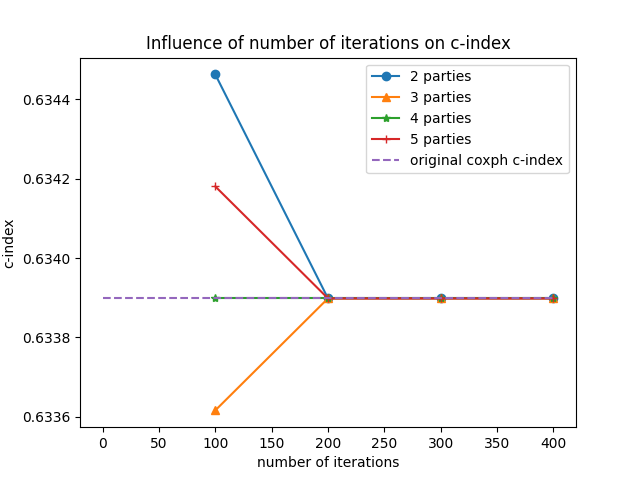

In [7]:
def plot_y_vs_iterations(y: str, yscale="linear", x_range=None, fig=None, ax=None):
    """
    x axis: iterations
    y: axis: c_index of central (constant) and decentral (multiple points)
    shape/color: number of parties
    """

    linestyles = ["--", "-.", ":"]
    markers = ["o", "^", "*", "+"]

    if ax is None:
        fig, ax = plt.subplots()

    data = parties_vs_iterations
    
    if x_range:
        filter_ = (data["iterations"] >=  x_range[0]) & (data["iterations"] <= x_range[1])
        data = parties_vs_iterations[filter_]

    
    
    for idx, (parties, group) in enumerate(data.groupby("parties")):
        ax.plot(group["iterations"], group[y], linestyle="-", marker=markers[idx],
                label=f"{int(parties)} parties", )
    
    ax.set_yscale(yscale)
        
    return fig, ax

X_LIMIT = 400
fig, ax = plot_y_vs_iterations("c_index_verticox", x_range=(-1, X_LIMIT))
        
central_x = [0, X_LIMIT]
central_y = [parties_vs_iterations["c_index_central"].iloc[0]]*2

ax.plot(central_x, central_y, label="original coxph c-index", linestyle="--")
ax.set_xlabel("number of iterations")
ax.set_ylabel("c-index")
ax.set_title("Influence of number of iterations on c-index")
plt.legend()

### Table

In [22]:
formatted = parties_vs_iterations[["parties", "iterations", "preparation_runtime", "convergence_runtime", "mse", "sad", "mad", "c_index_verticox", "c_index_central"]]\
    .set_index(["parties", "iterations"])\
    .sort_index()\
    .style.format("{:.4e}", subset=["mse", "sad", "mad"])\
    .format_index("{:.0f}")

display(formatted)

print(formatted.to_latex())

\begin{tabular}{llrrrrrrr}
 &  & preparation_runtime & convergence_runtime & mse & sad & mad & c_index_verticox & c_index_central \\
parties & iterations &  &  &  &  &  &  &  \\
\multirow[c]{6}{*}{2} & 100 & 5.349767 & 80.217799 & 4.2080e-09 & 2.5862e-04 & 1.4883e-04 & 0.634463 & 0.633898 \\
 & 200 & 5.254844 & 128.451124 & 2.7379e-14 & 7.1284e-07 & 3.5788e-07 & 0.633898 & 0.633898 \\
 & 300 & 5.389899 & 162.827923 & 2.9245e-15 & 1.9241e-07 & 1.1896e-07 & 0.633898 & 0.633898 \\
 & 400 & 5.309092 & 200.631222 & 5.8759e-15 & 2.4782e-07 & 1.7857e-07 & 0.633898 & 0.633898 \\
 & 500 & 5.298918 & 225.582957 & 7.2622e-16 & 9.8687e-08 & 5.9357e-08 & 0.633898 & 0.633898 \\
 & 1000 & 5.308558 & 394.353162 & 6.4518e-16 & 7.4555e-08 & 6.1778e-08 & 0.633898 & 0.633898 \\
\multirow[c]{6}{*}{3} & 100 & 6.050240 & 82.893001 & 6.5099e-09 & 3.2313e-04 & 1.8406e-04 & 0.633616 & 0.633898 \\
 & 200 & 6.113631 & 142.582830 & 6.4638e-13 & 3.2763e-06 & 1.5817e-06 & 0.633898 & 0.633898 \\
 & 300 & 6.125730 & 1

### Plotting MSE vs. parties and iterations

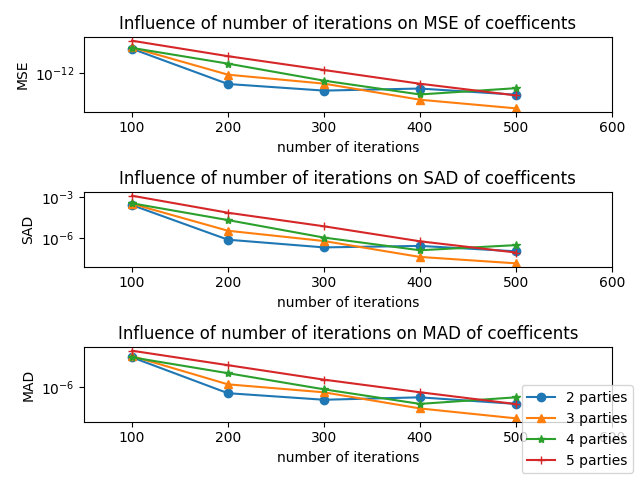

In [17]:
fig, ax = plt.subplots(3, 1)

for idx, metric in enumerate(["mse", "sad", "mad"]):
    sub_ax = ax[idx]
    plot_y_vs_iterations(metric, yscale="log", ax = sub_ax, x_range=(0, 600))
    
    sub_ax.set_xlabel("number of iterations")
    sub_ax.set_ylabel(metric.upper())
    sub_ax.set_title(f"Influence of number of iterations on {metric.upper()} of coefficents")
    sub_ax.set_xlim(50, 600)
    if metric == "mse":
        fig.legend(loc="lower right")

fig.tight_layout()

### Number of iterations & parties vs. runtime

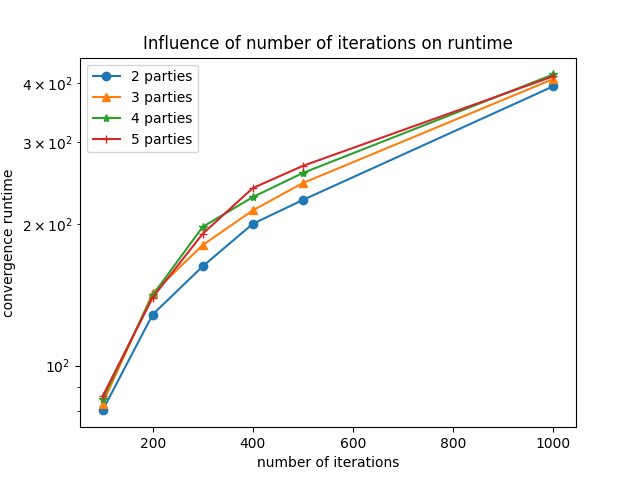

In [10]:
fig, ax = plot_y_vs_iterations("convergence_runtime", yscale="log")

ax.set_xlabel("number of iterations")
ax.set_ylabel("convergence runtime")
ax.set_title("Influence of number of iterations on runtime")
plt.legend()

## Features category
### Extract data

In [11]:
features_benchmark = df_mean[df_mean.category == "features"]
features_benchmark[["features", "preparation_runtime", "convergence_runtime"]].style.hide()

features,preparation_runtime,convergence_runtime
4.000000,5.674069,230.215694
6.000000,6.137171,245.182795
8.000000,6.511657,252.328409
10.000000,6.887933,258.893248


## Plot features vs preparation runtime

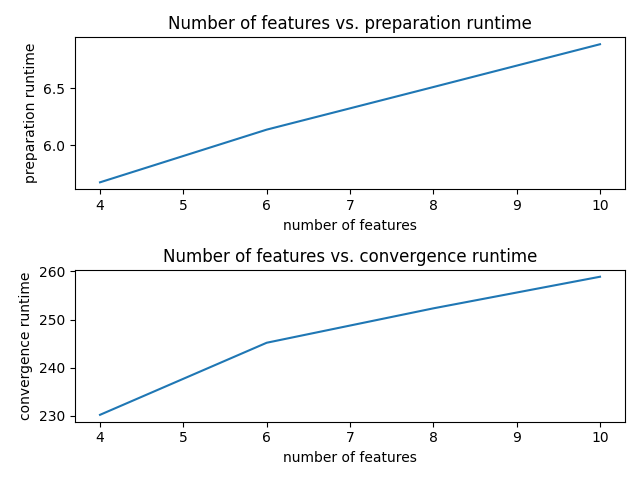

In [12]:
features = features_benchmark.features
preparation_runtime = features_benchmark.preparation_runtime
convergence_runtime = features_benchmark.convergence_runtime

fig, ax = plt.subplots(2)
ax[0].plot(features, preparation_runtime)
ax[0].set_xlabel("number of features")
ax[0].set_ylabel("preparation runtime")
ax[0].set_title("Number of features vs. preparation runtime")

ax[1].plot(features, convergence_runtime)
ax[1].set_xlabel("number of features")
ax[1].set_ylabel("convergence runtime")
ax[1].set_title("Number of features vs. convergence runtime")

plt.tight_layout()
plt.show()

## Plot features vs convergence runtime